# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/06-Python-APIs/2/Activities/10-Stu_API_Exceptions/Solved/api_exceptions.ipynb
# Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set empty lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

index_count = 0
set_count = 1

#used https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/06-Python-APIs/2/Activities/03-Ins_OpenWeatherRequest/Solved/Ins_OpenWeatherRequest.ipynb
#use try except method
#used https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/06-Python-APIs/2/Activities/07-Stu_Weather_Stats/Solved/weather_stats.ipynb
print("Beginning Data Retrieval ")
print("----------------------")

for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url).json()
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
        else:
            index_count = index_count + 1
            print(f"Processing Record {index_count} of Set {set_count} | {city}")
            pass
    except:
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
----------------------
Processing Record 1 of Set 1 | mataura
City not found. Skipping...
Processing Record 2 of Set 1 | methoni
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bira
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | gualaquiza
Processing Record 8 of Set 1 | wagga wagga
Processing Record 9 of Set 1 | byron bay
Processing Record 10 of Set 1 | seoul
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | butaritari
City not found. Skipping...
Processing Record 14 of Set 1 | puerto del rosario
City not found. Skipping...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | tahe
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | roma
Processing Record 20 of Set 1 | luanda
Processing Record 21 of Set 1 | fortuna
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/06-Python-APIs/2/Activities/10-Stu_API_Exceptions/Solved/api_exceptions.ipynb
#create df
weather_df = pd.DataFrame({
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'country': country,
    'Date': date
})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,country,Date
0,Mataura,-46.1927,168.8643,50.49,71,41,3.11,NZ,1627004508
1,Methóni,36.8197,21.7049,78.22,79,0,4.29,GR,1627004101
2,Ushuaia,-54.8000,-68.3000,38.86,70,75,4.61,AR,1627004508
3,Bira,49.0000,132.4667,92.41,44,45,4.83,RU,1627004509
4,Bredasdorp,-34.5322,20.0403,42.12,93,100,3.44,ZA,1627004509


In [5]:
#saving to CSV
weather_df.to_csv('output_data/weather_df.csv', encoding="utf-8", index=False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,country,Date
0,Mataura,-46.1927,168.8643,50.49,71,41,3.11,NZ,1627004508
1,Methóni,36.8197,21.7049,78.22,79,0,4.29,GR,1627004101
2,Ushuaia,-54.8000,-68.3000,38.86,70,75,4.61,AR,1627004508
3,Bira,49.0000,132.4667,92.41,44,45,4.83,RU,1627004509
4,Bredasdorp,-34.5322,20.0403,42.12,93,100,3.44,ZA,1627004509
...,...,...,...,...,...,...,...,...,...
565,Pak Phanang,8.3511,100.2020,87.08,71,100,11.18,TH,1627004651
566,Fort-Shevchenko,44.5086,50.2630,82.85,70,100,17.69,KZ,1627004651
567,Hirara,24.8000,125.2833,80.87,100,75,44.87,JP,1627004651
568,Champerico,14.3000,-91.9167,83.35,81,67,6.35,GT,1627004387


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

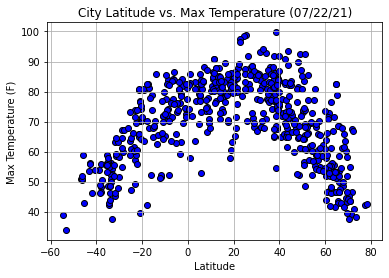

In [28]:
# Create a Scatter Plot for temperature vs latitude
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/06-Python-APIs/2/Activities/07-Stu_Weather_Stats/Solved/weather_stats.ipynb
#https://nu.bootcampcontent.com/NU-Coding-Bootcamp/nu-chi-data-pt-02-2021-u-c/-/blob/master/01-Lesson-Plans/05-Matplotlib/1/Activities/11-Ins_ScatterPlots/Solved/scatter_plot.ipynb

x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.title("City Latitude vs. Max Temperature (07/22/21)")
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

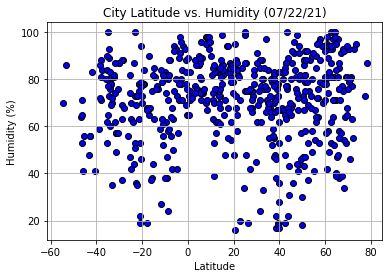

In [29]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.title("City Latitude vs. Humidity (07/22/21)")
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

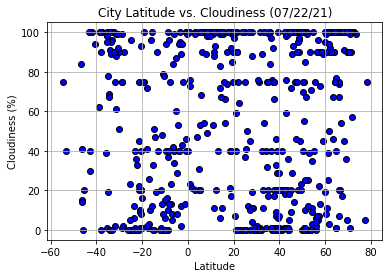

In [30]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.title("City Latitude vs. Cloudiness (07/22/21)")
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

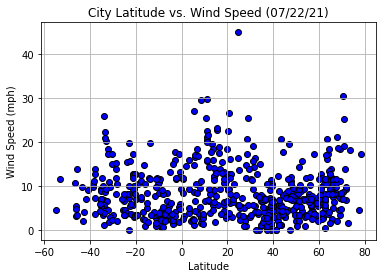

In [31]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.title("City Latitude vs. Wind Speed (07/22/21)")
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

## Linear Regression

In [35]:
#splitting data into northern and southern hemisphers
northern_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4391157445722713


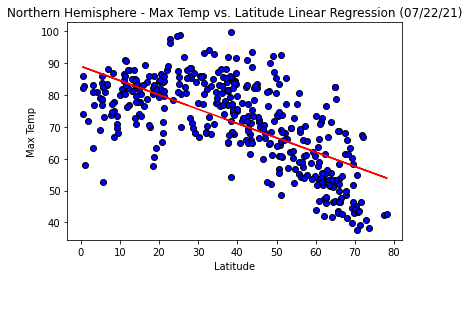

In [46]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/MaxTempvsLat-NH.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5574472608735824


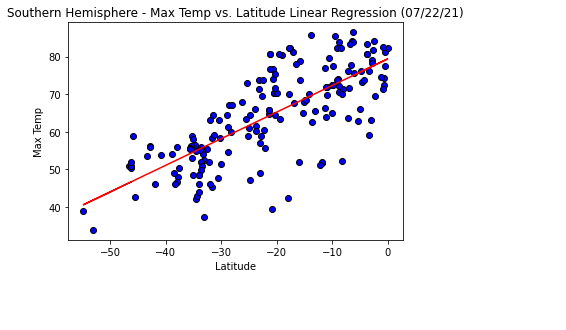

In [47]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/MaxTempvsLat-SH.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0020035361621504807


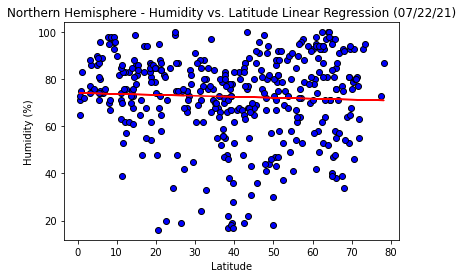

In [48]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/HumidityvsLat-NH.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005573868959587589


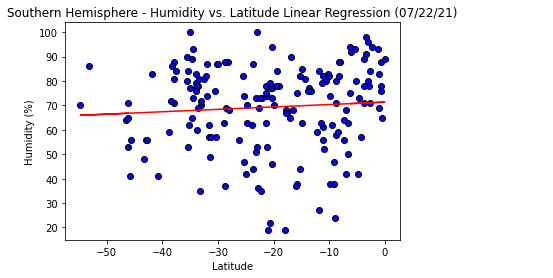

In [49]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/HumidityvsLat-SH.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0007578062580358466


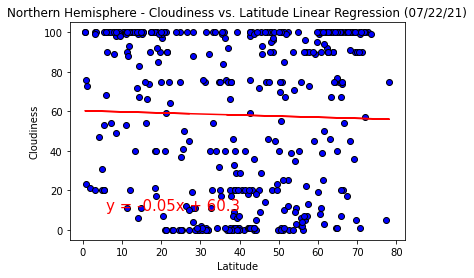

In [50]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/CloudinessvsLat-NH.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02454872132259342


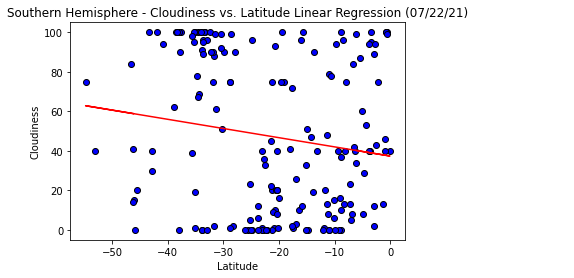

In [51]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/CloudinessvsLat-SH.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.019021417711275652


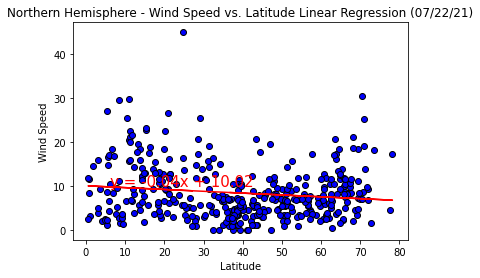

In [52]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/WindspeedvsLat-NH.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02109888253047752


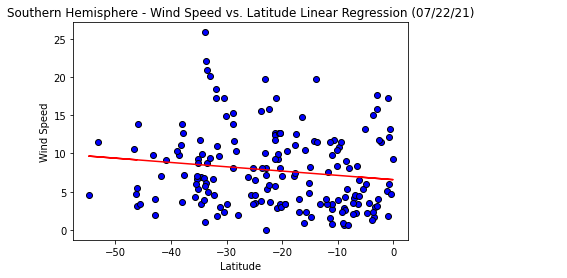

In [53]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (07/22/21)")
print(f"The r-value is: {rvalue**2}")
plt.savefig("output_data/WindspeedvsLat-SH.png")
plt.show()